In [1]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'mrve3'       #@param {type:"string"}
inicio  = '2007-01-28'  #@param {type:"date"}
termino = '2023-08-08'  #@param {type:"date"}
periodo = '10y'

usar_periodo = True #@param {type:"boolean"}

codigo = codigo.upper()

In [ ]:
##import datetime
from datetime import datetime, date
import numpy as np
import pandas as pd
# !pip install -q yfinance --upgrade --no-cache
import yfinance as yf

from scipy import stats
import statsmodels.api as sm

## plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

from deep_translator import GoogleTranslator
import textwrap

from IPython.display import clear_output, display, HTML
clear_output()

In [3]:
#@markdown A empresa e Indicadores fundamentalistas, dados do fundamentus.com.br

tk_info = yf.Ticker(codigo+".sa")
info = tk_info.get_info()
# info
try: L52 = info['fiftyTwoWeekLow']
except: L52 = None
try : H52 = info['fiftyTwoWeekHigh']
except: H52 = None
try: HP = info['targetHighPrice']
except: HP = None
try: LP = info['targetLowPrice']
except: LP = None
try: MP = info['targetMeanPrice']
except: MP = None
try: mP = info['targetMedianPrice']
except: mP = None

rec = GoogleTranslator(source='auto', target='pt').translate(info['recommendationKey'])

try: nAnal = info['numberOfAnalystOpinions']
except: nAnal = None

message = (
     f"\n\n\n De acordo com o yahoo finance, dentre {nAnal} analistas, "
     f"o menor preço-alvo é {LP}, "
     f"o maior {HP},"
     f"o preço alvo médio é {MP}, a mediana {mP}. "
     f'A recomentação é "{rec}".'
     f'Nas últimas 52 semanas o maior preço foi {H52} e o menor {L52}.'
)

apresenta = GoogleTranslator(source='auto', target='pt').translate(info['longBusinessSummary'])
print(codigo)
print("\n".join(textwrap.wrap(apresenta,118)))

print("\n".join(textwrap.wrap(message,118)))


MRVE3
A MRV Engennharia e a participação da S.A., juntamente com suas subsidiárias, opera como um promotor imobiliário no
Brasil e nos Estados Unidos. A empresa opera em quatro segmentos: Desenvolvimento imobiliário, Luggo, Resia e
Desenvolvimento da Terra. A empresa se envolve no desenvolvimento, construção e venda de imóveis de propriedade e
terceiros; desenvolvimento e aluguel de propriedades residenciais, bem como prestação de outros serviços; e
desenvolvimento e venda de subdivisões de terras urbanas residenciais e comerciais. Ele também fornece serviços de
consultoria imobiliária; lida em serviço de ofertas de bens e serviços em segmento imobiliário residencial; e detém
interesses de patrimônio. Além disso, a empresa oferece plataforma de solução habitacional para os apartamentos,
propriedades urbanizadas e unidades de aluguel; e serviços de engenharia técnica. O MRV Engennharia e a participação
S.A. foi fundado em 1979 e está sediado em Belo Horizonte, Brasil.
    De acordo com 

# Indicadores

In [3]:
import requests
from io import StringIO

#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
url = 'https://www.fundamentus.com.br/resultado.php'
#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(StringIO(r.text), decimal=',', thousands='.')[0]
dfunds = pd.DataFrame(funds)
(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
MRVE3,8.17,-3.45,0.87,0.449,"0,00%",0.162,0.63,3.4,-0.7,9.34,7.95,"13,20%","-13,06%",1.87,"5,02%","-25,34%",61559300.0,5.263330e+09,1.66,"10,61%"


In [4]:
url = 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/SI_Acoes.csv'
pd.set_option('display.max_columns', None)
fundsSI = pd.read_csv(url,sep=';' , decimal=',' ,thousands ='.' )

In [5]:
print('INDICADORES DE VALUATION')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[[ 'P/L', 'P/VP', 'P/ATIVOS', 'P/EBIT', 'EV/EBIT', 'PSR' ]]

INDICADORES DE VALUATION


,P/L,P/VP,P/ATIVOS,P/EBIT,EV/EBIT,PSR
TICKER,,,,,,
MRVE3,-3.55,0.9,0.17,-28.15,-75.91,0.46


| **Indicador** | **Nome**                                   | **Significado / Interpretação**                                                                                                                                                                                                                       |
| ------------- | ------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **P/L**       | Preço sobre Lucro                          | Indica quantos anos levaria para o investidor recuperar o valor investido via lucro (mantendo lucro constante). <br>**Fórmula**: Preço da ação / Lucro por ação. <br>**Baixo**: pode indicar ação barata (mas cuidado com lucros baixos temporários). |
| **P/VP**      | Preço sobre Valor Patrimonial              | Compara o valor de mercado da ação com o patrimônio líquido por ação. <br>**Fórmula**: Preço da ação / Valor patrimonial por ação. <br>**< 1**: ação negociada abaixo do valor contábil.                                                              |
| **P/ATIVOS**  | Preço sobre Ativos Totais                  | Compara o valor de mercado da empresa com seus ativos totais. <br>**Fórmula**: Valor de mercado / Ativos totais. <br>**Usado** para avaliar o quanto o mercado paga por unidade de ativo.                                                             |
| **P/EBIT**    | Preço sobre EBIT                           | Mede quanto os investidores estão pagando pelo lucro operacional. <br>**Fórmula**: Valor de mercado / EBIT. <br>Semelhante ao P/L, mas ignora despesas financeiras e impostos.                                                                        |
| **EV/EBIT**   | Enterprise Value sobre EBIT                | Mostra quanto o mercado paga pelo lucro operacional, considerando dívida líquida. <br>**Fórmula**: (Valor de mercado + Dívida líquida) / EBIT. <br>Mais abrangente que P/EBIT.                                                                        |
| **PSR**       | Preço sobre Receita (Price to Sales Ratio) | Avalia o quanto o mercado está pagando pela receita da empresa. <br>**Fórmula**: Valor de mercado / Receita. <br>**Baixo** pode indicar subavaliação, mas depende de margens.                                                                         |


In [6]:
print('INDICADORES DE VALOR CONTÁBIL')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[[ ' VPA', ' LPA']]

INDICADORES DE VALOR CONTÁBIL


,VPA,LPA
TICKER,,
MRVE3,9.35,-2.37


| **Indicador** | **Nome**                   | **Significado / Interpretação**                                                                                                       |
| ------------- | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **VPA**       | Valor Patrimonial por Ação | Representa o valor contábil da empresa por ação. <br>**Fórmula**: Patrimônio líquido / Número de ações.  |
| **LPA**       | Lucro por Ação             | Mede o lucro líquido gerado por cada ação. <br>**Fórmula**: Lucro líquido / Número de ações.           |


In [7]:
print('INDICADORES DE LIQUIDEZ')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[[ ' PEG Ratio','P/CAP. GIRO', 'P. AT CIR. LIQ.' ]]

INDICADORES DE LIQUIDEZ


,PEG Ratio,P/CAP. GIRO,P. AT CIR. LIQ.
TICKER,,,
MRVE3,-0.01,0.64,-0.37


| **Indicador**       | **Nome**                             | **Significado / Interpretação**                                                                                                                                              |
| ------------------- | ------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **PEG Ratio**       | Price/Earnings to Growth             | Ajusta o P/L pela taxa de crescimento dos lucros. <br>**Fórmula**: P/L / Crescimento anual do lucro (%) <br>**< 1** pode indicar ação barata com crescimento.                |
| **P/CAP. GIRO**     | Preço sobre Capital de Giro          | Mede o quanto o mercado paga pelo capital de giro (Ativo Circulante - Passivo Circulante). <br>**< 1**: pode indicar que empresa vale menos que seu capital de giro líquido. |
| **P. AT CIR. LIQ.** | Preço sobre Ativo Circulante Líquido | Mede o quanto o mercado paga pelo ativo circulante líquido (Ativo Circulante - Todas as dívidas). <br>Usado para avaliar liquidez e segurança patrimonial.                   |


In [9]:
print('INDICADORES DE  EFICIÊNCIA')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['MARGEM BRUTA','MARGEM EBIT', 'MARG. LIQUIDA']]

INDICADORES DE  EFICIÊNCIA


,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA
TICKER,,,
MRVE3,27.02,3.64,-7.38


| **Indicador**      | **Nome**                        | **Fórmula**                                                         | **O que mede?**                                                                                                                      |
| ------------------ | ------------------------------- | ------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| **Margem Bruta**   | Lucro Bruto / Receita Líquida   | `(Receita Líquida - Custo dos Produtos Vendidos) / Receita Líquida` | Mede o quanto sobra da receita após pagar o custo direto da produção (CPV). <br>**Avalia eficiência operacional bruta.**             |
| **Margem EBIT**    | EBIT / Receita Líquida          | `Lucro antes de Juros e Impostos / Receita Líquida`                 | Mede o lucro operacional em relação à receita. <br>**Avalia eficiência das operações, excluindo impacto financeiro e fiscal.**       |
| **Margem Líquida** | Lucro Líquido / Receita Líquida | `Lucro Líquido / Receita Líquida`                                   | Mede o lucro final da empresa após **todos os custos, despesas, impostos e juros**. <br>**Mostra a rentabilidade total do negócio.** |


| **Margem**  | **Alta**                                                     | **Baixa**                                              |
| ----------- | ------------------------------------------------------------ | ------------------------------------------------------ |
| **Bruta**   | Empresa consegue produzir/vender com custo reduzido.         | Custo de produção alto (pouco controle sobre insumos). |
| **EBIT**    | Boa gestão de despesas operacionais.                         | Gastos administrativos e operacionais pesados.         |
| **Líquida** | Empresa eficiente em toda a operação (inclusive financeira). | Alta carga tributária, juros ou má gestão geral.       |


In [10]:
print('INDICADORES DE  ENDIVIDAMENTO')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'LIQ. CORRENTE','PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS']]

INDICADORES DE  ENDIVIDAMENTO


,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,LIQ. CORRENTE,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS
TICKER,,,,,
MRVE3,25.84,1.47,1.47,0.21,0.76


| **Indicador**                   | **Nome**                               | **Fórmula**                             | **O que mede?**                                                                                                                                                               |
| ------------------------------- | -------------------------------------- | --------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Dívida Líquida / EBIT**       | Alavancagem Operacional                | `(Dívida Bruta - Caixa) / EBIT`         | Mede **quantos anos de geração de lucro operacional (EBIT)** a empresa precisaria para pagar sua **dívida líquida**. <br>**< 3** é geralmente considerado saudável.           |
| **Dívida Líquida / Patrimônio** | Alavancagem Financeira                 | `(Dívida Líquida) / Patrimônio Líquido` | Mede quanto da estrutura de capital é financiada por dívida em vez de capital próprio. <br>**Quanto menor, melhor** (menor dependência de terceiros).                         |
| **Liquidez Corrente**           | Capacidade de pagamento no curto prazo | `Ativo Circulante / Passivo Circulante` | Mede se a empresa consegue pagar suas dívidas de curto prazo com seus ativos circulantes. <br>**> 1** é desejável (mas muito alto pode indicar excesso de caixa ou estoques). |
| **Patrimônio / Ativos**         | Solidez da estrutura de capital        | `Patrimônio Líquido / Ativos Totais`    | Mede quanto dos ativos são financiados com capital próprio. <br>**Quanto maior, mais sólida e menos alavancada** é a empresa.                                                 |
| **Passivos / Ativos**           | Grau de Endividamento Total            | `Passivos Totais / Ativos Totais`       | Mede o **quanto da estrutura da empresa é financiada por dívida** (curto e longo prazo). <br>**Quanto menor, menos dependente de terceiros**.                                 |


| Indicador                       | Sinal de alerta se...                                |
| ------------------------------- | ---------------------------------------------------- |
| **Dívida Líquida / EBIT**       | Muito acima de 3 → risco financeiro.                 |
| **Dívida Líquida / Patrimônio** | Muito > 1 → empresa muito alavancada.                |
| **Liquidez Corrente**           | < 1 → dificuldade para pagar dívidas de curto prazo. |
| **Patrimônio / Ativos**         | Muito baixo → dependência de capital de terceiros.   |
| **Passivos / Ativos**           | Muito alto → risco de insolvência maior.             |


In [11]:
print('INDICADORES DE RENTABILIDADE')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['ROE', 'ROA', 'ROIC','GIRO ATIVOS']]

INDICADORES DE RENTABILIDADE


,ROE,ROA,ROIC,GIRO ATIVOS
TICKER,,,,
MRVE3,-11.55,-2.41,0.97,0.33


| **Indicador**       | **Nome**                                                           | **Fórmula**                                                      | **O que mede?**                                                                                                                                                                                  |
| ------------------- | ------------------------------------------------------------------ | ---------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **ROE**             | **Return on Equity** (Retorno sobre o Patrimônio Líquido)          | `Lucro Líquido / Patrimônio Líquido`                             | Mede o retorno gerado para os sócios. <br>Quanto a empresa gera de lucro **para cada R\$ 1 investido pelos acionistas**.                                                                         |
| **ROA**             | **Return on Assets** (Retorno sobre Ativos)                        | `Lucro Líquido / Ativos Totais`                                  | Mede a rentabilidade dos ativos da empresa. <br>Quanto a empresa gera de lucro **para cada R\$ 1 investido em ativos** (independente de ser capital próprio ou de terceiros).                    |
| **ROIC**            | **Return on Invested Capital** (Retorno sobre o Capital Investido) | `NOPAT / Capital Investido` <br>*(NOPAT = EBIT × (1 - imposto))* | Mede o retorno que a empresa gera **sobre o capital total investido** (dívida + capital próprio, excluindo caixa). <br>Mais preciso que ROE e ROA, pois foca apenas no capital usado no negócio. |
| **Giro dos Ativos** | **Asset Turnover** (Eficiência dos Ativos)                         | `Receita Líquida / Ativos Totais`                                | Mede **a eficiência da empresa em gerar receita com seus ativos**. <br>Quanto maior, mais eficiente (gera mais receita com menos ativo).                                                         |


| Indicador       | **Alta Rentabilidade / Eficiência**           | **Baixa Rentabilidade / Eficiência**                           |
| --------------- | --------------------------------------------- | -------------------------------------------------------------- |
| **ROE**         | Empresa gera bons lucros aos acionistas       | Baixo retorno sobre o patrimônio                               |
| **ROA**         | Empresa rentável mesmo com poucos recursos    | Lucro baixo em relação ao total de ativos                      |
| **ROIC**        | Retorno alto sobre o capital usado no negócio | Pode indicar destruição de valor se menor que custo de capital |
| **Giro Ativos** | Ativos bem utilizados (vendas fortes)         | Ativos ociosos ou baixa demanda                                |


In [12]:
print('INDICADORES DE CRESCIMENTO')
fundsSI[fundsSI['TICKER']==codigo].set_index('TICKER')[['CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS']]

INDICADORES DE CRESCIMENTO


,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS
TICKER,,
MRVE3,8.27,NaN


| **Indicador**            | **Nome**                                      | 
| ------------------------ | --------------------------------------------- | 
| **CAGR Receitas 5 anos** | Taxa composta de crescimento da Receita       | 
| **CAGR Lucros 5 anos**   | Taxa composta de crescimento do Lucro Líquido | 



| CAGR (%)             | **Significado**                                                       |
| -------------------- | --------------------------------------------------------------------- |
| **Alta (>10%)**      | Forte crescimento sustentado (positivo, desde que com rentabilidade). |
| **Moderada (5–10%)** | Crescimento saudável e estável.                                       |
| **Baixa (<5%)**      | Crescimento lento. Pode ser aceitável em setores maduros.             |
| **Negativa**         | Queda de receita ou lucros no período — alerta!                       |


# DRE

In [13]:
def adicionar_espacos(s):
    resultado = [s[0]]

    for char_atual in s[1:]:
        if char_atual.isupper() and resultado[-1].islower():
            resultado.append(' ')
        resultado.append(char_atual)

    return ''.join(resultado)

dre = tk_info.quarterly_financials
dre = dre[dre.columns[::-1]]

k=[]
v=[]
for i in dre.index:
    #print(i)
    j = adicionar_espacos(i)
    k.append(i)
    #print(translator.translate(i, dest='pt').text)
    v.append(GoogleTranslator(source='auto', target='pt').translate(j))
trad = dict(zip(k, v))
dre_trimestre = dre.rename(index=trad)
# dre_trimestre

In [ ]:
display(HTML(dre_trimestre.to_html()))

,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00
Efeito tributário de itens incomuns,-49966060.0,-40821080.0,43897060.0,-64481340.0,-73157800.0
Taxa de imposto para calcs,0.34,0.34,0.34,0.34,0.34
Ebitda normalizada,115745000.0,194054000.0,145780000.0,199779000.0,114132000.0
Itens totais incomuns,-146959000.0,-120062000.0,129109000.0,-189651000.0,-215170000.0
Itens incomuns totais excluindo a boa vontade,-146959000.0,-120062000.0,129109000.0,-189651000.0,-215170000.0
Lucro líquido da operação contínua juros minoritários líquidos,-169299000.0,-71333000.0,-12722000.0,-249848000.0,-358813000.0
Depreciação reconciliada,39167000.0,38052000.0,52324000.0,43073000.0,64774000.0
Custo reconciliado da receita,1412186000.0,1682577000.0,1795307000.0,1743089000.0,1629056000.0
EBITDA,-31214000.0,73992000.0,274889000.0,10128000.0,-101038000.0
EBIT,-70381000.0,35940000.0,222565000.0,-32945000.0,-165812000.0


## balanço

In [15]:
balanco = tk_info.get_balance_sheet(freq='quarterly')
balanco = balanco[balanco.columns[::-1]]

k=[]
v=[]
for i in balanco.index:
    j = adicionar_espacos(i)
    # print(adicionar_espacos(i))
    k.append(i)
    #print(translator.translate(i, dest='pt').text)
    #v.append(translator.translate(j, dest='pt').text)
    v.append(GoogleTranslator(source='auto', target='pt').translate(j))

traducao = dict(zip(k, v))
balanco_trimestre=balanco.rename(index=traducao)
# balanco_trimestre

In [24]:
display(HTML(balanco_trimestre.to_html()))

,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00
Número de ações do Tesouro,NaN,1348.0,1348.0,1348.0,1348.0,1348.0
Número de ações ordinárias,NaN,562825323.0,562825323.0,562825323.0,562825323.0,562825323.0
Ação emitida,NaN,562826671.0,562826671.0,562826671.0,562826671.0,562826671.0
Apenas dívida,NaN,7490620000.0,7819249000.0,8092971000.0,9366055000.0,8829358000.0
Dívida total,NaN,8075803000.0,8268409000.0,8432961000.0,9780618000.0,9363441000.0
Valor contábil tangível,NaN,6436356000.0,6461032000.0,6389472000.0,6250709000.0,5801370000.0
Capital investido,NaN,14692846000.0,14912625000.0,15002794000.0,16213207000.0,15359566000.0
Capital de giro,NaN,5941365000.0,5487216000.0,4651119000.0,5553259000.0,4115122000.0
Ativos tangíveis líquidos,NaN,6436356000.0,6461032000.0,6389472000.0,6250709000.0,5801370000.0
Obrigações de arrendamento de capital,0.0,NaN,NaN,NaN,NaN,NaN


In [26]:
fig = make_subplots(rows=3,
                    cols=2,
                    row_heights=[5,5,5],
                    column_widths=[3,3],
                    subplot_titles=('Receita Bruta', 'Lucro Líquido',
                                    'Dívida CP', 'Dívida LP',
                                    'Capital de Giro','Divida Líquida',
                                    ),
                    shared_xaxes=False)
try:fig.add_trace(go.Scatter(name='Receita_bruta', x=dre.columns, y=dre.loc['Operating Revenue'], mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=1, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Receita_liquida', x=dre.columns, y=dre.loc['Net Income'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=1, col=2)
except:pass

try: fig.add_trace(go.Scatter(name='Divida_CP', x=balanco.columns, y=balanco.loc['CurrentDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=2, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Divida_CP', x=balanco.columns, y=balanco.loc['LongTermDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=2, col=2)
except:pass

try:fig.add_trace(go.Scatter(name='WC', x=balanco.columns, y=balanco.loc['WorkingCapital'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=3, col=1)
except:pass
try:fig.add_trace(go.Scatter(name='Divida_liquida', x=balanco.columns, y=balanco.loc['NetDebt'],mode='lines+markers',marker_size=15,marker_symbol='diamond'), row=3, col=2)
except:pass

fig.update_layout(title_text=f'<b>Gráfico de alguns fundamentos de {codigo}<b>',
                  showlegend=False, #esconder ou mostrar legenda
                  height=900, #altura
                  width=900) #largura


fig.show()

# Empresas do mesmo setor

In [ ]:
# empresaas X setores
url = 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/setores.csv'
setores = pd.read_csv(url, sep =';')
setores.rename(columns={'LISTAGEM': 'TICKER' , 'SETOR ECONÔMICO': 'SETOR'}, inplace=True)

SET = setores[setores['TICKER']==codigo[0:4]]['SETOR'].values[0]
SUBSET = setores[setores['TICKER']==codigo[0:4]]['SUBSETOR'].values[0]

# papeis do mesmo setor e subsetor
mesmo_setor = setores[(setores['SETOR'] == SET) & (setores['SUBSETOR'] == SUBSET)].reset_index(drop=True).copy()
mesmo_setor['TICKER'] = mesmo_setor['TICKER'].str.strip()

SEG = mesmo_setor["SEGMENTO"].iloc[0]

print(f'Setor: {SET}; Subsetor: {SUBSET}; Segmento: {SEG}') 


Setor: Consumo Cíclico; Subsetor: Construção Civil; Segmento: Incorporações


In [28]:
'''selecionar os papeis do mesmo setor e subsetor que estão no IBr100 e IBrA'''

IBR100 = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_IBr100.csv'
                     , usecols=[0], sep=';', encoding='latin1', skiprows=1, skipfooter=2, engine='python').reset_index()
IBRA = pd.read_csv('https://raw.githubusercontent.com/BDonadelli/Finance-playground/main/data/Cart_IBrA.csv'
                       , usecols=[0] , sep=';', encoding='latin1', skiprows=1, skipfooter=2, engine='python').reset_index()
listagem = mesmo_setor[['TICKER']].dropna().reset_index(drop=True)

IBR100['TICKER'] = IBR100['index'].str[:4]
IBRA['TICKER'] = IBRA['index'].str[:4]

IBrA = IBRA[IBRA['TICKER'].isin(listagem['TICKER'])]
if codigo in IBrA : IBrA.remove(codigo)

IBr100 = IBR100[IBR100['TICKER'].isin(listagem['TICKER'])]
if codigo in IBr100 : IBr100.remove(codigo)

IBr100.columns = ['ticker', 'empresa','Código']
IBrA.columns = ['ticker', 'empresa','Código']


In [30]:
mesmo_setor_tickers =  list(listagem.TICKER.values)
if len(IBrA)<=2 : IBr = mesmo_setor_tickers
else : IBr = IBrA


In [42]:
print(f'mesmo setor ({SET}) e subsetor ({SUBSET}): ')

print(*mesmo_setor_tickers)
print(f'Ações no indice IBR100', end=': ')
print(*IBr100.ticker)
print(f'Ações no indice IBRA', end=': ')
print(*IBrA.ticker)

mesmo setor (Consumo Cíclico) e subsetor (Construção Civil): 
AVLL CALI CURY CYRE DIRR EVEN EZTC FIEI GFSA HBOR INNC JHSF JFEN KLAS LAVV MELK MTRE MDNE MRVE PDGR PLPL RDNI RSID TCSA TEGA TEND TRIS VIVR
Ações no indice IBR100: CURY3 CYRE3 DIRR3 EZTC3 MRVE3 TEND3
Ações no indice IBRA: CURY3 CYRE3 DIRR3 EVEN3 EZTC3 GFSA3 JHSF3 LAVV3 MDNE3 MRVE3 PLPL3 TEND3


In [49]:
media_pl = dfunds[dfunds['Papel'].str[:4].isin(list(mesmo_setor_tickers)+[codigo])]['P/L'].mean()
print(f'\nO P/L médio das empresas do mesmo setor e subsetor é {media_pl:.2f}')
media_pl_indice = dfunds[dfunds['Papel'].isin(list(IBr.ticker.values)+[codigo])]['P/L'].mean()
print(f'\nO P/L médio das empresas do setor no índice amplo é {media_pl_indice:.2f}')
print(f'\nP/L de {codigo} é', (dfunds.loc[dfunds['Papel']==codigo])['P/L'].values[0] )


O P/L médio das empresas do mesmo setor e subsetor é 3.91

O P/L médio das empresas do setor no índice amplo é 9.62

P/L de MRVE3 é -4.99


In [144]:
dfunds_renomeado = dfunds.rename(columns={'Papel': 'TICKER'})
#  quais colunas são exclusivas de cada DataFrame (sem sobreposição)
colunas_fundsSI = set(fundsSI.columns)
colunas_dfunds = set(dfunds_renomeado.columns)
colunas_unicas_dfunds = [col for col in dfunds_renomeado.columns if col not in colunas_fundsSI or col == 'TICKER']
# Filtra dfunds apenas com colunas não repetidas
dfunds_filtrado = dfunds_renomeado[colunas_unicas_dfunds]
# merge
df_funds = pd.merge(fundsSI, dfunds_filtrado, on='TICKER', how='inner')

colunas=['TICKER', 'Cotação',  'Div.Yield',
         'P/L', 'P/VP', 'P/EBIT',
         'MARGEM BRUTA','MARGEM EBIT', 'MARG. LIQUIDA',
         'EV/EBIT',  'EV/EBITDA',  
         'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 
         'ROE', 'ROA', 'ROIC',
         ' VPA', ' LPA', 
         'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS']

display(df_funds[colunas][df_funds['TICKER'].isin(list(IBr.ticker.values)+[codigo])].fillna(0).reset_index(drop=True))

,TICKER,Cotação,Div.Yield,P/L,P/VP,P/EBIT,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,EV/EBIT,EV/EBITDA,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,ROE,ROA,ROIC,VPA,LPA,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS
0,CURY3,29.53,"4,11%",11.96,7.62,9.39,38.82,21.36,16.77,9.11,7.97,-0.28,-0.23,63.68,14.82,30.98,3.89,2.47,30.96,35.15
1,CYRE3,25.66,"4,17%",5.75,1.05,4.83,32.60,24.36,20.48,6.31,7.96,1.48,0.32,18.28,7.82,11.20,24.35,4.45,15.17,32.67
2,DIRR3,40.40,"9,23%",10.81,3.24,8.89,37.03,22.20,18.26,9.34,8.53,0.44,0.16,29.96,6.15,16.56,12.56,3.76,18.09,45.38
3,EVEN3,7.28,"5,49%",46.85,0.77,18.04,26.88,4.37,1.68,21.09,5.76,3.05,0.13,1.65,0.60,1.38,9.43,0.16,2.43,-23.57
4,EZTC3,13.65,"8,56%",6.81,0.61,8.11,35.19,22.74,27.07,9.19,10.25,1.07,0.08,9.02,6.35,5.06,22.17,2.00,14.17,9.48
5,GFSA3,18.01,"0,00%",-3.08,0.06,-1.43,-5.60,-8.60,-3.98,-17.32,-8.20,-15.89,0.67,-1.97,-0.80,-3.99,296.52,-5.84,20.38,0.00
6,JHSF3,5.22,"7,71%",3.35,0.62,2.29,58.77,90.78,62.12,4.38,9.97,2.09,0.57,18.55,7.33,11.73,8.44,1.57,20.35,27.06
7,LAVV3,12.48,"8,23%",6.79,1.63,5.81,34.22,26.28,22.48,5.82,7.03,0.01,0.00,24.07,10.19,15.28,7.64,1.84,51.55,52.04
8,MDNE3,24.12,"5,14%",7.33,1.27,7.28,33.77,16.55,16.43,7.72,6.62,0.45,0.08,17.33,6.63,11.20,18.98,3.29,30.95,0.00
9,MRVE3,6.14,"0,00%",-4.98,0.58,10.10,27.02,3.64,-7.38,35.93,10.17,25.84,1.47,-11.55,-2.41,0.97,10.65,-1.23,8.27,0.00


In [99]:

lista = list(IBr.ticker.values) + [codigo]

luc = dfunds[dfunds['Papel'].isin(lista)].set_index('Papel')[['Mrg. Líq.' , 'Mrg Ebit' , 'ROIC', 'ROE', 'Div.Yield', 'Cresc. Rec.5a']]
end = dfunds[dfunds['Papel'].isin(lista)].set_index('Papel')[['Dív.Brut/ Patrim.']]
val = dfunds[dfunds['Papel'].isin(lista)].set_index('Papel')[['P/L', 'P/VP', 'EV/EBIT', 'EV/EBITDA']]
liq = dfunds[dfunds['Papel'].isin(lista)].set_index('Papel')[['Liq. Corr.']]

fig = make_subplots(rows=6,
                    cols=2,
                    row_heights=[5,5,5,5,5,5],
                    column_widths=[3,3],
                    subplot_titles=('Margem EBITDA', 'Margem Líquida',
                                    'ROIC', 'ROE',
                                    'Div Bruta/PL', 'CAGR 5Y',
                                    'Preço/Lucro', 'P/VP',
                                    'EV/EBIT', 'EV/EBITDA',
                                    'Liquidez Corrente', 'Div Yeld'),
                    horizontal_spacing=0.31,
                    shared_xaxes=False)

fig.add_trace(go.Bar(name='Margem_Ebtida', x=luc.index, y=luc['Mrg Ebit']), row=1, col=1)
fig.add_trace(go.Bar(name='Margem_Liquida', x=luc.index, y=luc['Mrg. Líq.']), row=1, col=2)

fig.add_trace(go.Bar(name='ROIC', x=luc.index, y=luc['ROIC']), row=2, col=1)
fig.add_trace(go.Bar(name='ROE', x=luc.index, y=luc['ROE']), row=2, col=2)

fig.add_trace(go.Bar(name='div/patr', x=end.index, y=end['Dív.Brut/ Patrim.']), row=3, col=1)
fig.add_trace(go.Bar(name='c5y', x=luc.index, y=luc['Cresc. Rec.5a']), row=3, col=2)

fig.add_trace(go.Bar(name='pl', x=val.index, y=val['P/L']), row=4, col=1)
fig.add_trace(go.Bar(name='pvp', x=val.index,y=val['P/VP']), row=4, col=2)

fig.add_trace(go.Bar(name='evebit', x=val.index, y=val['EV/EBIT']), row=5, col=1)
fig.add_trace(go.Bar(name='evebitda', x=val.index, y=val['EV/EBITDA']), row=5, col=2)

fig.add_trace(go.Bar(name='liq', x=liq.index, y=liq['Liq. Corr.']), row=6, col=1)
fig.add_trace(go.Bar(name='dy', x=luc.index, y=luc['Div.Yield']), row=6, col=2)

fig.update_layout(title_text=f'<b>Dados Fundamentalistas das principais empresas de {SUBSET}<b>',
                #   template='plotly_dark',#template pré-definido da plotly
                  showlegend=False, #esconder ou mostrar legenda
                  height=1200, #altura
                  width=1000) #largura
fig.show()

# Preços históricos

In [62]:
#@markdown Download dos preços históricos do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo :
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False,auto_adjust=True)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False,auto_adjust=True)
else :
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False,auto_adjust=True)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False,auto_adjust=True)

In [63]:
ativo = ativo.droplevel(1, axis=1)
ibov = ibov.droplevel(1, axis=1)

In [64]:
if len(ativo[ativo['Stock Splits']!=0])>0 : ativo[ativo['Stock Splits']!=0][['Stock Splits']]
ativo=ativo.loc['2009-06-03':]
ativo[['Open','High','Low','Close','Close','Volume']]

Price,Open,High,Low,Close,Close,Volume
Date,,,,,,
2015-07-08,5.685873,5.885507,5.685873,5.841144,5.841144,2028706
2015-07-10,5.907688,5.952051,5.781992,5.818963,5.818963,1866017
2015-07-13,5.885507,5.915082,5.796780,5.841144,5.841144,3075233
2015-07-14,5.848537,5.907688,5.781992,5.907688,5.907688,1781208
2015-07-15,5.818963,6.025990,5.818963,5.989021,5.989021,2660318
...,...,...,...,...,...,...
2025-07-02,6.440000,6.470000,6.190000,6.250000,6.250000,8502300
2025-07-03,6.260000,6.330000,6.160000,6.160000,6.160000,5518400
2025-07-04,6.160000,6.310000,6.110000,6.290000,6.290000,3697300


In [91]:
ativo['Retorno'] = ativo['Close'].pct_change()
ibov['Retorno'] = ibov['Close'].pct_change()
ativo['Retorno Acumulado'] = (1 + ativo['Retorno']).cumprod()
ibov['Retorno Acumulado'] = (1 + ibov['Retorno']).cumprod()

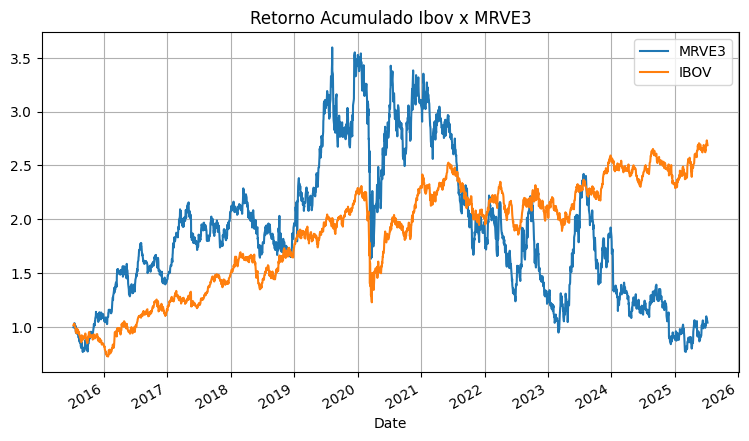

In [153]:
ativo['Retorno Acumulado'].plot(title=f'{codigo} - Retorno Acumulado', figsize=(9,5), grid=True, label=codigo, legend=True);
ibov['Retorno Acumulado'].plot(title=f'Retorno Acumulado Ibov x {codigo}', figsize=(9,5), grid=True, label='IBOV' , legend=True);

In [65]:
if  ativo['Stock Splits'].sum() > 0 :print('Atenção, o ativo teve desdobramento de ações, os preços estão ajustados para isso.')

#### Dividendos

In [66]:
url1 = f'https://www.fundamentus.com.br/proventos.php?papel={codigo}&tipo=2'
header = { "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36", "X-Requested-With": "XMLHttpRequest"}
r1 = requests.get(url1, headers=header)
dy = pd.read_html(StringIO(r1.text), decimal=',', thousands='.')[0]
dy['Data'] = pd.to_datetime(dy['Data'] , dayfirst=True)
dy.set_index('Data',inplace =True )
dy['Valor/acao'] = dy['Valor']/dy['Por quantas ações']

fig = go.Figure(
    [ go.Bar(x=dy.index.year , y = dy['Valor'],name='Valor'),
     go.Bar(x=dy.index.year , y = dy['Valor/acao'],name='Valor/ação')],
    layout=dict(title='Dividendos ',height=500, width=700 ))
fig.show()

In [67]:
yanual = dy['Valor'].groupby(pd.Grouper(freq='YS')).sum()
yieldanual_medio = yanual.mean()
CloseAnual = ativo['Close'].groupby(pd.Grouper(freq='YS')).mean()

dy_yield_anual = yanual / CloseAnual
dy_yield_anual = dy_yield_anual.dropna()
dy_yield_anual


2015-01-01    0.069785
2016-01-01    0.041605
2017-01-01    0.058594
2018-01-01    0.092292
2019-01-01    0.071390
2020-01-01    0.020513
2021-01-01    0.043558
2022-01-01    0.039291
Freq: YS-JAN, dtype: float64

In [68]:
DeltaAno =  (ativo.index[-1].year -1) - ativo.index[0].year
SomaDivAnos = round(yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])].sum(),2)
DivMedio = round(yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])].mean(),2)
CloseMedio = round( np.mean(ativo['Close']),2 )

print(f'Distribuição de {codigo}', end=' ')
print(f'em {DeltaAno} anos, R$ {SomaDivAnos}, ou R$ {round(SomaDivAnos/DeltaAno,2)} ao ano em média')
print(f"preço fechamento médio R$ {CloseMedio}")

print(f'provento anual medio R$ {DivMedio}')
print(f"preço fechamento médio R$ {CloseMedio}")
print(f"DY por essas médias {round( 100*(DivMedio/CloseMedio),2)}%")

Distribuição de MRVE3 em 9 anos, R$ 4.51, ou R$ 0.5 ao ano em média
preço fechamento médio R$ 10.96
provento anual medio R$ 0.64
preço fechamento médio R$ 10.96
DY por essas médias 5.84%


In [69]:
import plotly.express as px

# Preparar os dados
dados_filtrados = yanual[(yanual.index >= ativo.index[0]) & (yanual.index < ativo.index[-1])]

# Criar o gráfico
fig = px.bar(
    x=dados_filtrados.index.year.astype(str),  # Converter index para string
    y=dados_filtrados.values,
    title='Dividendos anuais no período de preços de negociação disponíveis',
    labels={'x': 'Ano', 'y': 'Dividendos (R$)'}
)

fig.update_layout(height=300, width=600)
fig.show()

Nos últimos $\leq 6$ anos

In [151]:
if (ativo.index[0].year <= date.today().year - 7) :  apartir = dy[dy.index.year > date.today().year - 7 ]
else : apartir = dy.copy()
apartir_anual = apartir['Valor'].groupby(pd.Grouper(freq='YS')).sum() 

#### tendencia

In [154]:
df_m, df_b = np.polyfit(apartir_anual.index.year, apartir_anual.values, 1)

fig = go.Figure()

fig.add_trace(
    go.Bar(name='DY anual',
    x=apartir_anual.index.year.astype(str),
    y=apartir_anual.values
))

fig.add_trace(
    go.Scatter(
    x=apartir_anual.index.year,
    y=apartir_anual.values,
    text= apartir_anual.values.round(decimals=2),
    mode='text',
    textposition='top center',
    textfont=dict(size=12),
    showlegend=False
))


fig.add_trace(go.Scatter(name='DY anual médio',
    x=apartir_anual.index.year,
    y=[apartir_anual.values.mean()]*len(apartir_anual.index.year),
    mode='lines',
    line = dict(color = 'red' , width=2)
))

# fig.add_trace(
#     go.Scatter(name='variação percentual DY', visible='legendonly',
#     x=yanual.index.year,
#     y=yanual.pct_change().fillna(0),
#     mode='lines',
#     marker = dict(color = 'brown')
# ))

fig.add_trace(
    go.Scatter(name='Tendência DY',
    x=apartir_anual.index.year,
    y=df_m*apartir_anual.index.year+df_b,
    mode='lines',
    line = dict(color = 'black', dash='dot')
))

fig.update_layout(title= f"DY anual (taxa = {df_m:.2f})" , width=900, height=380 )
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Dividendo no ano")

fig.show()

#### preço fechamento

In [72]:
qual_preco = 'Close'
preco = pd.DataFrame()
preco = pd.merge(ativo[qual_preco],ibov[qual_preco],left_index = True, right_index = True, how = 'inner')
preco.columns = [codigo,"ibov"]
preco

,MRVE3,ibov
Date,,
2015-07-08,5.841144,51782.0000
2015-07-10,5.818963,52591.0000
2015-07-13,5.841144,53119.0000
2015-07-14,5.907688,53239.0000
2015-07-15,5.989021,52902.0000
...,...,...
2025-07-02,6.250000,139051.0000
2025-07-03,6.160000,140928.0000
2025-07-04,6.290000,141478.0000


In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Bandas com média móvel 21 períodos e 2dp
preco['mm21'] = preco[codigo].rolling(21).mean()
Mov_SD = preco[codigo].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD

# Filtrar dados a partir de 2019
dados_plot = preco.loc['2019':]

# Criar gráfico
fig = go.Figure()

# Adicionar preço
fig.add_trace(go.Scatter(
    x=dados_plot.index,
    y=dados_plot[codigo],
    mode='lines',
    name='Preço',
    line=dict(color='blue')
))

# Adicionar média móvel
fig.add_trace(go.Scatter(
    x=dados_plot.index,
    y=dados_plot['mm21'],
    mode='lines',
    name='MM21',
    line=dict(color='red')
))

# Adicionar banda superior
fig.add_trace(go.Scatter(
    x=dados_plot.index,
    y=dados_plot['mm21+2dp'],
    mode='lines',
    name='Banda Superior',
    line=dict(color='gray', dash='dash')
))

# Adicionar banda inferior
fig.add_trace(go.Scatter(
    x=dados_plot.index,
    y=dados_plot['mm21-2dp'],
    mode='lines',
    name='Banda Inferior',
    line=dict(color='gray', dash='dash'),
    fill='tonexty',  # Preenchimento entre bandas
    fillcolor='rgba(128,128,128,0.1)'
))

fig.update_layout(
    title=f'Bandas de Bollinger - {codigo}',
    yaxis_title='Preço',
    xaxis_title='Data',
    hovermode='x unified'
)

fig.show()

## simulação de preços
 [movimento browniano geométrico](https://pt.wikipedia.org/wiki/Movimento_browniano_geom%C3%A9trico) (GBM):


Esse modelo simula o comportamento de uma ação usando a fórmula

$$
S_t = S_{t-\Delta t}e^{\left( \mu - \frac{\sigma^2}{2} \right) \Delta t + \sigma z_t \sqrt{\Delta t}}
$$

em que $S_0$ e $S_t$ são o preço da ação no início e no instante $t$, respectivamente,  $\mu$ e $\sigma$ são a média e o desvio padrão do retorno esperado de uma ação, e $z_i$ é uma componente aleatória --- um número sorteado a partir de uma [distribuição normal](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal) com média 0 e desvio padrão 1 --- e $\Delta t$ é o número de dias das taxa de retorno (como estamos trabalhando com retorno diário $\Delta t=1$)
$$
S_t = S_{0}e^{\left( \mu - \frac{\sigma^2}{2} \right) t + \sigma z_t }
$$
A componente $\exp{\left( \mu - {\sigma^2}/{2} \right)t}$ é conhecida como **deriva** (*drift*) e modela uma tendência determinística do preço da ação: $S_t = S_0 \exp{\left( \mu - {\sigma^2}/{2} \right)t}$.

A componente $\exp {\sigma W_t}$ é conhecida como **difusão** (*diffusion*), e é usado para modelar um conjunto de eventos imprevisíveis que ocorrem durante este movimento.



In [155]:
rate = preco[codigo].pct_change().fillna(0)
s_media = rate.mean()
s_devp  = rate.std()
S0 = preco[codigo].iloc[0]

drift = pd.Series(s_media - (s_devp**2)/2 , index=preco.index)
St_dri = S0*np.exp(drift.cumsum())

Z = ( rate - s_media) / s_devp
diffusion = Z * s_devp
St_dif = S0*np.exp(diffusion.cumsum())

St = S0 * np.exp((drift+diffusion).cumsum())

trace1 = go.Scatter(x=preco.index , y = St_dri , name='drift')
trace2 = go.Scatter(x=preco.index , y = preco[codigo] , name=codigo, line=dict(color='rgba(1.0 ,0, 0, 0.5)'))
trace3 = go.Scatter(x=preco.index , y = St_dif , name='difusão')
trace4 = go.Scatter(x=preco.index , y = St , name='modelo' , line=dict(color='rgba(0, 0.5, 0.5, 0.5)'))
figdata = [trace1,trace3,trace2,trace4]
fig = go.Figure(data=figdata)
fig.update_layout(title='parametros de um GBM', height=380, width=850 )

fig.show()

<Axes: xlabel='Date'>

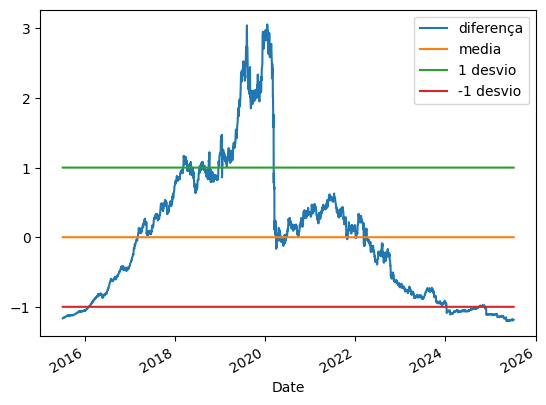

In [75]:
diferenca = pd.DataFrame()
diferenca['diferença'] = (preco[codigo] - St)
diferenca['media'] = diferenca['diferença'].mean()
diferenca['1 desvio'] = diferenca['diferença'].std()
diferenca['diferença'] = (diferenca['diferença'] - diferenca['media'])/diferenca['1 desvio']
diferenca['media'] = 0
diferenca['1 desvio'] = 1
diferenca['-1 desvio'] = -1

diferenca.plot(layout=dict(height=300, width=700 ))

In [156]:
n_dias = 3#@param {type:"integer"}
n_cenarios = 1000#@param {type:"integer"}
n_grafico = 10*n_dias

In [157]:
# Função para simular o GBM
def simula(S0 , dias , mu , sigma , n_paths, seed=None):
    np.random.seed(seed)
    dt = 1 / dias  # Número de dias de negociação no período de simulação ) :
    S = []
    for i in range(n_paths):
        path = []
        for t in range(dias+1):
            if t == 0 :
                path.append(S0)
            else:
               z = np.random.normal(0.0, 1.0)
               St = path[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
               path.append(St)
        S.append(path)
    return np.array(S)


simulacao = simula(preco[codigo].iloc[-1] , n_dias , s_media , s_devp , n_cenarios).transpose()

# Criar DataFrame com os preços simulados
dias_simulados = pd.date_range(start=preco.index[-1], periods=n_dias+1 ,freq='B')  # Considerando dias úteis
df_simulado = pd.DataFrame(simulacao , index = dias_simulados )
df_simulado.iloc[:, :10].head()


,0,1,2,3,4,5,6,7,8,9
2025-07-08,6.070000,6.070000,6.070000,6.070000,6.070000,6.070000,6.070000,6.070000,6.070000,6.070000
2025-07-09,6.285934,6.017020,6.065629,6.126303,6.026624,6.030191,5.982975,6.155718,6.022776,6.197007
2025-07-10,6.193896,5.927649,6.009931,6.052891,6.167667,6.108795,5.936359,6.023590,6.159823,6.247563
2025-07-11,6.275780,5.747410,6.013246,5.967162,6.319211,6.256962,5.826715,5.926983,6.250172,6.266827


In [158]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=preco[codigo].iloc[-n_grafico:].index , y =preco[codigo].iloc[-n_grafico:]  , mode='lines' , name = 'preço'))

for i in range(n_cenarios):
    fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado[i]  , mode='lines' ))
    fig.data[i+1].update(showlegend=False)

fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.05,axis=1) , mode='lines' , line=dict(color='black',width=4), name='percentil 5'))
fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.5,axis=1)  , mode='lines' , line=dict(color='black',width=3), name='mediana'))
fig.add_trace(go.Scatter(x=df_simulado.index , y = df_simulado.quantile(0.95,axis=1) , mode='lines' , line=dict(color='black',width=4), name='percentil 95'))

fig.add_trace(go.Scatter(name='mm21',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21'].iloc[-n_grafico:].values,
                         mode='lines', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(name='mm21+2dp',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21+2dp'].iloc[-n_grafico:].values,
                         mode='lines', line=dict(color='gray', dash='dash') ))
fig.add_trace(go.Scatter(name='mm21-2dp',
                         x=preco[codigo].iloc[-n_grafico:].index ,
                         y= preco['mm21-2dp'].iloc[-n_grafico:].values,
                         mode='lines',line=dict(color='gray', dash='dash')))

fig.update_layout(
    title='Simulações de preço GBM',
    xaxis=dict(title='Data', dtick='D', tickformat='%d-%m', rangebreaks=[dict(bounds=["sat", "mon"])]),  # Excluir sábado e domingo
    yaxis=dict(title='Preço', side='right'),  # Posicionando os rótulos do eixo y no lado esquerdo
    width=1000,
    height=480,
    showlegend=False
)

# fig.update_xaxes(dtick='D', tickformat='%d-%m' ,
#     rangebreaks=[
#         dict(bounds=["sat", "mon"]),  # Excluir sábado e domingo
#     ]
# )

fig.show()

intervalo de confiança para preços na  simulação

In [159]:
def ic ( m,s, alfa) :
    l, u = stats.norm.interval(confidence=alfa,  loc=m , scale= s)
    return "{:.2f}".format(l), "{:.2f}".format(u)

alfa=.9

for i in range(n_dias):
    m = np.mean(df_simulado.iloc[i+1])
    s = stats.sem(df_simulado.iloc[i+1])

    print(f'dia {str(i+1)}: {str(100*alfa)}% -> ' , end='')
    print(f'({ic(m,s,alfa)[0]} , {ic(m,s,alfa)[1]})' , end='     95% ->')
    print(f'({ic(m,s,alfa+.05)[0]} , {ic(m,s,alfa+.05)[1]})' , end='     99% ->')
    print(f'({ic(m,s,alfa+.09)[0]} , {ic(m,s,alfa+.09)[1]})')

dia 1: 90.0% -> (6.07 , 6.08)     95% ->(6.07 , 6.08)     99% ->(6.06 , 6.08)
dia 2: 90.0% -> (6.07 , 6.09)     95% ->(6.07 , 6.09)     99% ->(6.07 , 6.09)
dia 3: 90.0% -> (6.07 , 6.09)     95% ->(6.07 , 6.09)     99% ->(6.07 , 6.10)


In [160]:
trace1 = go.Histogram(x=df_simulado.iloc[1] , nbinsx= int(2*(df_simulado.shape[1])**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=df_simulado.iloc[-1], nbinsx= int(2*(df_simulado.shape[-1])**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=df_simulado.iloc[1],name='primeiro dia simulado')
trace4 = go.Box(y=df_simulado.iloc[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title='Distribuição dos preços na simulação', height=350, width=800)

fig.show()

## Fatos estilizados

In [162]:
log_retorno = np.log(ativo['Close']).diff().dropna()
weekly_log_ret = np.log(ativo['Close'].resample('W').last()).diff().dropna()
monthly_log_ret= np.log(ativo['Close'].resample('ME').last()).diff().dropna()